Epoch 0, Loss: 0.15431337515943885
Epoch 100, Loss: 0.11921625583969976
Epoch 200, Loss: 0.08387951565124238
Epoch 300, Loss: 0.05673695460249577
Epoch 400, Loss: 0.038263710156137526
Epoch 500, Loss: 0.026316525547526167
Epoch 600, Loss: 0.018614088878850812
Epoch 700, Loss: 0.013547781767194128
Epoch 800, Loss: 0.010120667901305728
Epoch 900, Loss: 0.007734499434364844
Training complete!
Updated weights and biases:
Weights Input-Hidden:
 [[ 0.35350437  0.97144883  0.68638914  0.60127042]
 [ 0.05083992  0.25966712 -0.16994039  0.87923581]]
Biases Hidden:
 [[-0.04207149  0.04146904 -0.0912096   0.00522387]]
Weights Hidden-Output:
 [[ 0.24935081  0.76822803]
 [-0.40930173  1.04468628]
 [ 0.51491807  0.26580296]
 [-0.36392604  0.2776799 ]]
Biases Output:
 [[-0.59200193  0.10223274]]


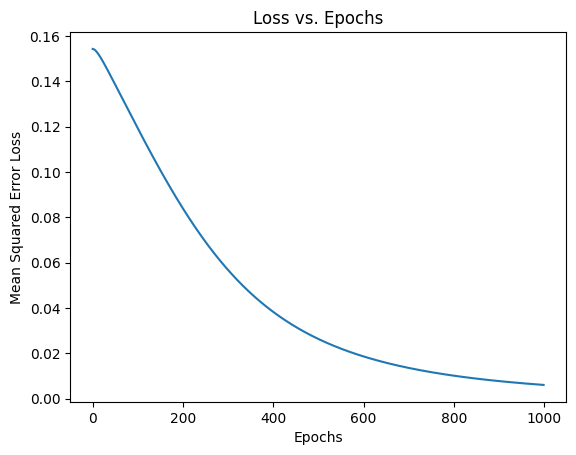

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    biases_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    biases_output = np.zeros((1, output_size))

    return weights_input_hidden, biases_hidden, weights_hidden_output, biases_output

# Function to calculate the output of the neural network
def forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output):
    hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))  # Sigmoid activation function
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    predicted_output = 1 / (1 + np.exp(-output_layer_input))  # Sigmoid activation function

    return hidden_layer_output, predicted_output

# Function to calculate the mean squared error loss
def calculate_loss(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

# Function to perform batch momentum-based gradient descent
def gradient_descent(X, Y, learning_rate, momentum, epochs):
    input_size = X.shape[1]
    hidden_size = 4  # You can adjust the number of hidden units
    output_size = Y.shape[1]

    # Initialize parameters
    weights_input_hidden, biases_hidden, weights_hidden_output, biases_output = initialize_parameters(input_size, hidden_size, output_size)

    # Initialize momentum terms
    beta = momentum
    delta_weights_input_hidden = np.zeros_like(weights_input_hidden)
    delta_biases_hidden = np.zeros_like(biases_hidden)
    delta_weights_hidden_output = np.zeros_like(weights_hidden_output)
    delta_biases_output = np.zeros_like(biases_output)

    # Store loss for plotting
    losses = []

    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_output, predicted_output = forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)

        # Backpropagation
        error = Y - predicted_output
        output_delta = error * (predicted_output * (1 - predicted_output))
        hidden_layer_delta = output_delta.dot(weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

        # Update momentum terms
        delta_weights_input_hidden = (beta * delta_weights_input_hidden) + (1 - beta) * X.T.dot(hidden_layer_delta)
        delta_biases_hidden = (beta * delta_biases_hidden) + (1 - beta) * np.sum(hidden_layer_delta, axis=0, keepdims=True)
        delta_weights_hidden_output = (beta * delta_weights_hidden_output) + (1 - beta) * hidden_layer_output.T.dot(output_delta)
        delta_biases_output = (beta * delta_biases_output) + (1 - beta) * np.sum(output_delta, axis=0, keepdims=True)

        # Update weights and biases
        weights_input_hidden += learning_rate * delta_weights_input_hidden
        biases_hidden += learning_rate * delta_biases_hidden
        weights_hidden_output += learning_rate * delta_weights_hidden_output
        biases_output += learning_rate * delta_biases_output

        # Calculate and store loss
        loss = calculate_loss(Y, predicted_output)
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    print("Training complete!")

    # Display updated weights and biases
    print("Updated weights and biases:")
    print("Weights Input-Hidden:\n", weights_input_hidden)
    print("Biases Hidden:\n", biases_hidden)
    print("Weights Hidden-Output:\n", weights_hidden_output)
    print("Biases Output:\n", biases_output)

    # Plot loss w.r.t. epoch
    plt.plot(range(epochs), losses)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error Loss')
    plt.title('Loss vs. Epochs')
    plt.show()

# Dataset
X = np.array([[0.5, 2.5]])
Y = np.array([[0.2, 0.9]])

# Hyperparameters
learning_rate = 0.01
momentum = 0.9
epochs = 1000

# Perform gradient descent
gradient_descent(X, Y, learning_rate, momentum, epochs)
